In [20]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font',family='serif',size=10)
from scipy import optimize
import sympy as sp
from scipy.special import erf 
from tikzplotlib import save as tikz_save

In [2]:
def autoval(y,Bi):
    return (np.tan(y)*y-Bi )**2


def autoval_plot(y,Bi):
    return (np.tan(y)*y-Bi )  

def An(lambdanL):
    An = 2*np.sin(lambdanL) / (np.cos(lambdanL)*np.sin(lambdanL)+lambdanL )
    return An

def sol_completa(x,Fo,An,lambdanL):
    return np.sum(An*np.cos(lambdanL*x)*np.exp(-lambdanL**2*Fo))
    
    

### Determinacion de los autovalores

#### Visualización de la ecuación de autovalores.

<IPython.core.display.Javascript object>


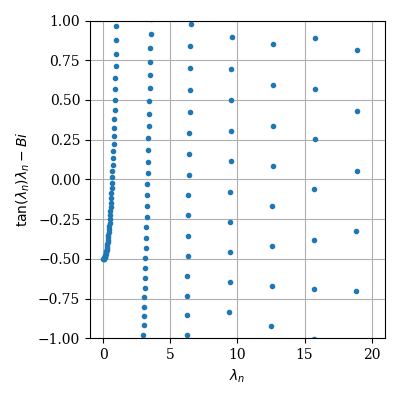

In [25]:
fig0,ax0 = plt.subplots(figsize=(4,4))
y = np.linspace(0,20,1000)
ax0.plot(y,autoval_plot(y,0.5),'.');
ax0.set_xlabel('$\lambda_n $')
ax0.set_ylabel(r'$\tan(\lambda_n  )\lambda_n-Bi$')
ax0.set_ylim([-1,1])
ax0.grid()
fig0.tight_layout()


#### Cómputo de las raices de la ecuación

In [29]:
sols = []
sol1 = optimize.fsolve(autoval, 1, args=(0.5,), fprime=None, full_output=0)[0]

#parametros funcion / pista / args Biot=0.5

sols.append(sol1)
for n in range(100):    
    out1 = optimize.fsolve(autoval, sol1+3, args=(0.5,), fprime=None, full_output=0)
    #print(out1)
    sol1 = out1[-1]
    sols.append(sol1)
sols = np.array(sols)

### Aplicación sobre un problema y estudio de la convergencia de la solución de tiempos largos y de tiempos cortos respecto de la solución completa.

<IPython.core.display.Javascript object>


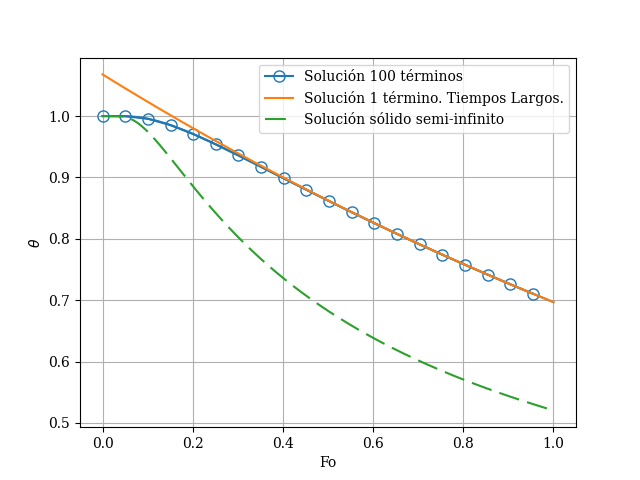

/home/juan/.local/lib/python3.6/site-packages/tikzplotlib/_axes.py:211: MatplotlibDeprecationWarning: Passing the minor parameter of get_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  data, "minor x", obj.get_xticks("minor"), obj.get_xticklabels("minor")
/home/juan/.local/lib/python3.6/site-packages/tikzplotlib/_axes.py:216: MatplotlibDeprecationWarning: Passing the minor parameter of get_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  data, "minor y", obj.get_yticks("minor"), obj.get_yticklabels("minor")


In [31]:
fig2,ax2 = plt.subplots()
L = 10
a = 1e-5
xi = 1
time = np.linspace(1e-3,1e7,200)
Fo_s = a*time/L**2
sol_c = np.zeros_like(Fo_s)
sol_1 = np.zeros_like(Fo_s)
#itero y evaluo la solucion completa

#for i in range(100):
#    Foi = Fo_s[i]

for i,Foi in enumerate(Fo_s):
    sol_c[i] = sol_completa(xi/L,Foi,An(sols),sols)
    sol_1[i] = sol_completa(xi/L,Foi,An(sols[:1]),sols[:1])
lin, = ax2.plot(Fo_s,sol_c,markerfacecolor='none')
ax2.plot(Fo_s[::10],sol_c[::10],markerfacecolor='none',color=lin.get_color(),marker='o',markersize=8,label='Solución 100 términos')
ax2.plot(Fo_s,sol_1,label='Solución 1 término. Tiempos Largos.')

eta = xi / (4*time*a/L**2)**.5

ax2.plot(Fo_s,erf(eta),'--',dashes=[10,4],label='Solución sólido semi-infinito');
ax2.set_xlabel('Fo',)
ax2.set_ylabel(r'$\theta$')
ax2.grid();
ax2.legend()
tikz_save('/home/juan/Documents/Ensenanza/latex/apuntes/conduccion_transitorio/tikz_images/convergencia_1.tikz')